In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

In [90]:
df = pd.read_csv('Heart Disease data.csv')
df1 = pd.read_csv('Heart Disease data.csv')

In [91]:
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


## Domain Analysis
* age - age of the person
* sex - gender
* cp - chest pain  [ 0: asymptomatic, 1: atypical angina, 2: non-anginal pain, 3: typical angina]
* trestbps - rest blood pressure
* chol - cholesterol level
* fbs - fasting blood sugar level (> 120 mg/dL)  [0 = no, 1 = yes]
* restecg - rest ecg [0: showing probable or definite left ventricular hypertrophy by Estes’ criteria, 1: normal, 2: having ST-T wave abnormality]
* thalach - maximum heart rate achieved
* exang - exercise induced angina [1: yes, 0 : no]
* oldpeak - st depression induced by exercise relative to rest
* slope - the slope of the peak exercise st segment [0: downsloping; 1: flat; 2: upsloping]
* ca - number of blood vessels(3)
* thal - if the disease can be treated [1 = normal, 2 = fixed defect, 3 = reversible defect]
* target - [0 - disease, 1 - no disease]

### Basic Checks

In [92]:
df.info()  #checking the data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [93]:
df.describe()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [94]:
#shape of the data
df.shape

(1025, 14)

## Data Cleaning

In [95]:
df.duplicated().sum()  #checking for duplicate values

723

In [96]:
df.drop_duplicates(inplace = True) #dropping the duplicates

In [97]:
df.shape  #the shape of the data after dropping the duplicate

(302, 14)

In [98]:
df.nunique()  #checking for number of unique values

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [99]:
df.dtypes  #checking for data type

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [100]:
#checking if the data provided is correct


# get the categorical columns into one list
df_categorical = []
for i in df.columns:
  if int(df[i].nunique()) < 6:
    df_categorical.append(i)
  else:
    pass


In [101]:
for i in df_categorical:
  print(f'df[{i}] : {list(df[i].unique())}')  #printing all the categorical values


df[sex] : [1, 0]
df[cp] : [0, 1, 2, 3]
df[fbs] : [0, 1]
df[restecg] : [1, 0, 2]
df[exang] : [0, 1]
df[slope] : [2, 0, 1]
df[ca] : [2, 0, 1, 3, 4]
df[thal] : [3, 2, 1, 0]
df[target] : [0, 1]


In [102]:
df[df['ca'] == 4]  #finding all the columns where ca = 4

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
52,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
128,52,1,2,138,223,0,1,169,0,0.0,2,4,2,1
348,43,1,0,132,247,1,0,143,1,0.1,1,4,3,0
521,58,1,1,125,220,0,1,144,0,0.4,1,4,3,1


In [103]:
df.loc[df['ca'] == 4, 'ca'] = np.NaN  #replacing the value 4 with nan

In [104]:
df['ca'].unique()

array([ 2.,  0.,  1.,  3., nan])

In [105]:
df[df['ca'].isna()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
52,38,1,2,138,175,0,1,173,0,0.0,2,NaN,2,1
128,52,1,2,138,223,0,1,169,0,0.0,2,NaN,2,1
348,43,1,0,132,247,1,0,143,1,0.1,1,NaN,3,0
521,58,1,1,125,220,0,1,144,0,0.4,1,NaN,3,1


In [106]:
df['thal'].value_counts()   # counting the unique values of thal

2    165
3    117
1     18
0      2
Name: thal, dtype: int64

In [107]:
#replacing the 0 value with null
df.loc[df['thal'] == 0, 'thal'] = np.NaN

In [108]:
df['thal'].value_counts()

2.0    165
3.0    117
1.0     18
Name: thal, dtype: int64

In [109]:
#checking for missing values and replace them
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64

In [110]:
#replacing the null values with median
df = df.fillna(df.median())
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [111]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.665563,2.327815,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,0.935142,0.583683,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,3.000000,1.000000


In [112]:
#changing the data lebels
df['target'] = df['target'].replace({1: "Disease", 0: 'No Disease'})
df['sex'] = df['sex'].replace({1 : 'Male', 0 : 'Female'})
df['cp'] = df['cp'].replace({0 : 'typical angina',
                            1 : 'atypical angina',
                            2 : 'non anginal pain',
                             3 : 'asymtomatic'})
df['restecg'] = df['restecg'].replace({0 : 'left ventricular hypertrophy', 1 : 'normal', 2: 'ST-T wave abnormality'})
df['exang'] = df['exang'].replace({1 : 'Yes', 0: 'No'})
df['fbs'] = df['fbs'].replace({1 : 'Yes fbs', 0: 'No fbs'})
df['slope'] = df['slope'].replace({0 : 'upsloping', 1 : 'flat', 2 : 'downslopping'})
df['thal'] = df['thal'].replace({1 : 'fixed defect', 2 : 'reversible defect', 3 : 'normal'})

In [113]:
df['ca'] =df['ca'].astype(int)  #changing the datatype of column 'ca' to int

In [114]:
df.head(1)  #checking

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,Male,typical angina,125,212,No fbs,normal,168,No,1.0,downslopping,2,normal,No Disease


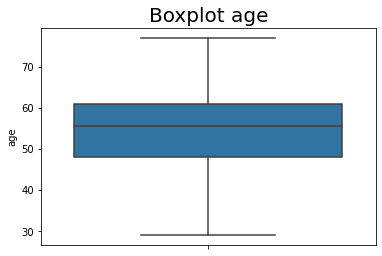

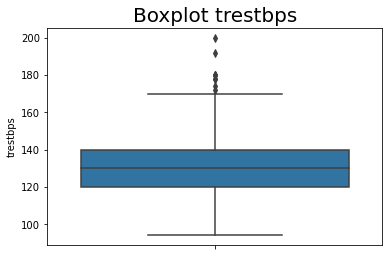

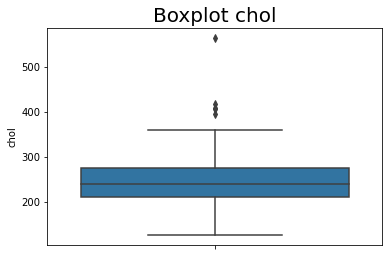

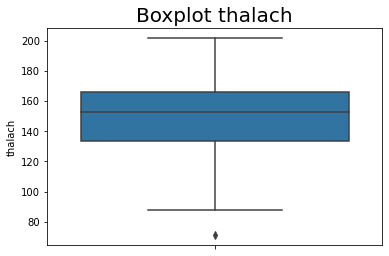

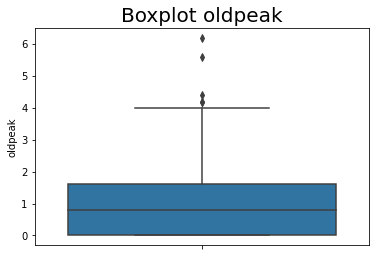

In [115]:
# box plot
col = ['age','trestbps', 'chol', 'thalach', 'oldpeak']
for i in col:
    
    sns.boxplot(data = df, y = i)
    plt.title(f'Boxplot {i}', fontsize = 20)
    plt.show()
    


In [116]:
def outliers(data, drop = False):
    for i in data.columns:
        feature_data = data[i]
        Q1 = np.percentile(feature_data, 25.) # 25th percentile
        Q3 = np.percentile(feature_data, 75.) # 75th percentile
        IQR = Q3 - Q1  #Interquartile range
        out  = IQR * 1.5
        outliers = feature_data[~((feature_data >= Q1 - out) & (feature_data <= Q1 + out))].index.tolist()
        if not drop:
            print(f'Feature {i} : No of outliers {len(outliers)}')
        if drop:
            df.drop(outliers, inplace = True, errors = 'ignore')
            print(f'Outliers from {i} feature is removed')

In [117]:
outliers(df[col], drop = True)

Outliers from age feature is removed
Outliers from trestbps feature is removed
Outliers from chol feature is removed
Outliers from thalach feature is removed
Outliers from oldpeak feature is removed


<AxesSubplot:xlabel='target', ylabel='count'>

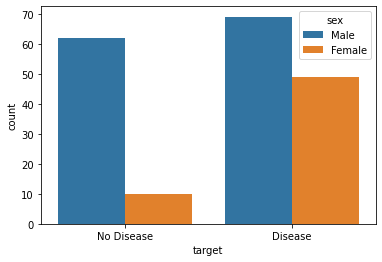

In [118]:
sns.countplot(data = df, x = 'target', hue = 'sex')

<AxesSubplot:xlabel='cp', ylabel='count'>

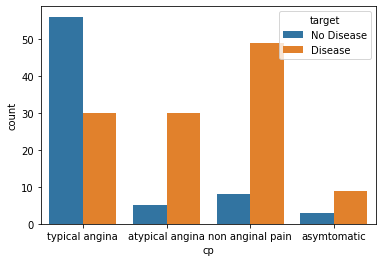

In [119]:
sns.countplot(data = df, x = 'cp', hue = 'target')

<AxesSubplot:xlabel='fbs', ylabel='count'>

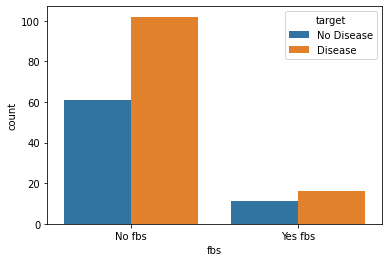

In [120]:
sns.countplot(data = df, x = 'fbs', hue = 'target')

<AxesSubplot:xlabel='age', ylabel='Count'>

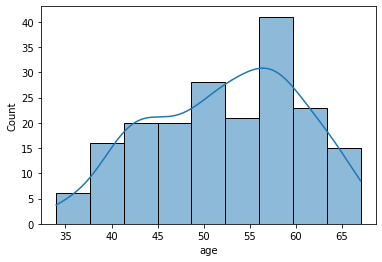

In [121]:
sns.histplot(data = df, x = 'age', kde = True)

<AxesSubplot:xlabel='chol', ylabel='Count'>

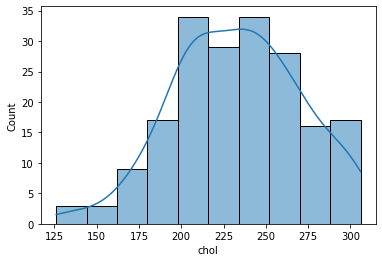

In [122]:
sns.histplot(data = df, x = 'chol', kde = True)

<AxesSubplot:xlabel='thalach', ylabel='Count'>

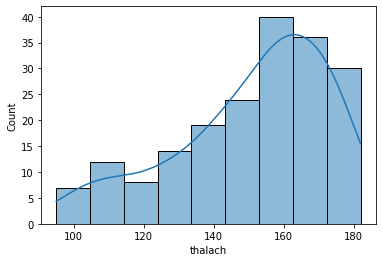

In [123]:
sns.histplot(data = df, x = 'thalach', kde = True)

<AxesSubplot:xlabel='oldpeak', ylabel='Count'>

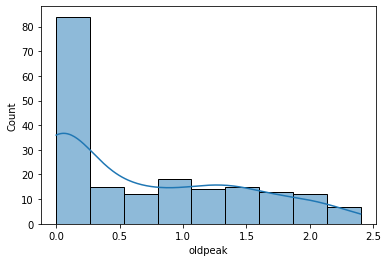

In [124]:
sns.histplot(data = df, x = 'oldpeak', kde = True)

<AxesSubplot:xlabel='trestbps', ylabel='Count'>

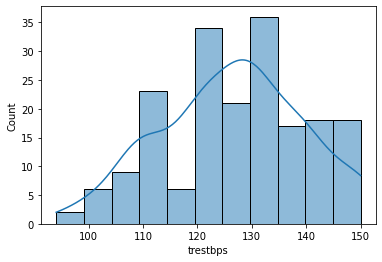

In [125]:
sns.histplot(data = df, x = 'trestbps', kde = True)

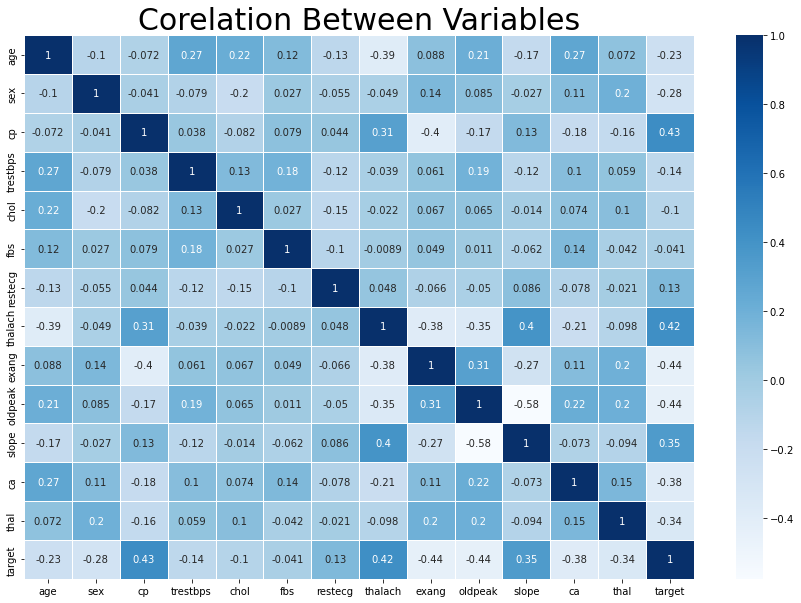

In [126]:
#correlation
plt.figure(figsize = (15,10))
sns.heatmap(df1.corr(), annot = True, linewidths=.5, cmap="Blues")
plt.title('Corelation Between Variables', fontsize = 30)
plt.show()

In [127]:
df.skew()

age        -0.230642
trestbps   -0.138302
chol       -0.134256
thalach    -0.801795
oldpeak     0.662621
ca          1.451023
dtype: float64

In [128]:
df.thalach.skew()

-0.8017948052226884

<AxesSubplot:xlabel='thalach'>

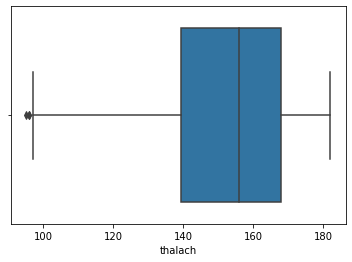

In [129]:
sns.boxplot(data = df, x = 'thalach')

In [130]:
df.thalach.describe()


count    190.000000
mean     150.936842
std       21.898424
min       95.000000
25%      139.250000
50%      156.000000
75%      168.000000
max      182.000000
Name: thalach, dtype: float64

## Machine Learning

In [131]:
#importting libraries
from sklearn.model_selection import train_test_split

In [132]:
X = df.drop(columns = 'target')

In [133]:
X.rename(columns = {'cp' : 'chestpain', 'trestbps' : 'rest_bp', 'fbs' : 'fasting_blood_sugar', 'thalach': 'Max_heartrate', 'exang': 'exercise_induced_angina', 'oldpeak':'st_depression', 'thal' : 'Treated'}, inplace = True)

In [134]:
X['sex'] = X['sex'].map({'Male' : 1, 'Female' : 0})
X.rename(columns = {'cp' : 'chestpain'}, inplace = True)

In [135]:
X.head()

,age,sex,chestpain,rest_bp,chol,fasting_blood_sugar,restecg,Max_heartrate,exercise_induced_angina,st_depression,slope,ca,Treated
0,52,1,typical angina,125,212,No fbs,normal,168,No,1.0,downslopping,2,normal
3,61,1,typical angina,148,203,No fbs,normal,161,No,0.0,downslopping,1,normal
4,62,0,typical angina,138,294,Yes fbs,normal,106,No,1.9,flat,3,reversible defect
5,58,0,typical angina,100,248,No fbs,left ventricular hypertrophy,122,No,1.0,flat,0,reversible defect
8,46,1,typical angina,120,249,No fbs,left ventricular hypertrophy,144,No,0.8,downslopping,0,normal


In [136]:
X.chestpain

0        typical angina
3        typical angina
4        typical angina
5        typical angina
8        typical angina
             ...       
708    non anginal pain
719      typical angina
733    non anginal pain
739      typical angina
878      typical angina
Name: chestpain, Length: 190, dtype: object